1)	Import the required libraries
2)	Input the dataset
3)	Define features and labels
4)	Scale the dataset
5)	Separate the dataset into training and testing
6)	Create the cost and gradient function
7)	Calculate the weights and bias
8)	Plot the cost
9)	Predict labels with the calculated weights and biases
10)	Measure how good the model is by calculating the R-squared value.

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# input the dataset
data = pd.read_csv('19BCE2072_Multiple_Linear_Regression_Data.csv')
data

,y,X1,X2
0,140,60,22
1,155,62,25
2,159,67,24
3,179,70,20
4,192,71,15
5,200,72,14
6,212,75,14
7,215,78,11


In [3]:
# split the dataset into x and y
x = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [4]:
y

array([140, 155, 159, 179, 192, 200, 212, 215])

In [5]:
# scale the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [6]:
x

array([[-1.63236452,  0.78512469],
       [-1.28412676,  1.39296316],
       [-0.41353235,  1.19035034],
       [ 0.1088243 ,  0.37989904],
       [ 0.28294318, -0.63316507],
       [ 0.45706207, -0.8357779 ],
       [ 0.97941871, -0.8357779 ],
       [ 1.50177536, -1.44361637]])

In [7]:
# separate the dataset into training and testing
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3,random_state=42)

In [8]:
# create the cost and gradient functions
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost at epoch", epoch, "is:", cost)
        
    return w, b, cost_list

In [9]:
# calculate the weights and bias
w, b, c = GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=20000)

Cost at epoch 0 is: 18429.29852980183
Cost at epoch 2000 is: 49.89291684803794
Cost at epoch 4000 is: 24.55572683300466
Cost at epoch 6000 is: 20.378300676590666
Cost at epoch 8000 is: 17.262212982973367
Cost at epoch 10000 is: 14.906461747535754
Cost at epoch 12000 is: 13.125432650091778
Cost at epoch 14000 is: 11.778913037826989
Cost at epoch 16000 is: 10.76089762747721
Cost at epoch 18000 is: 9.991242758530152


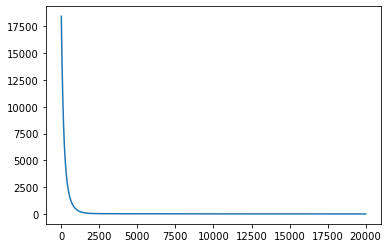

In [10]:
# plot the cost
plt.plot(c)

In [11]:
# predict labels with the calculated weights and biases
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(Xtest, w, b)

In [12]:
print('w =', y_pred[1])
print('b =', y_pred[2])

X = 141.25148385545117
w = 194.3132973984051
b = 137.63568876871602


In [13]:
# calculating R-squared value for measuring goodness of our model
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(y_pred, Ytest)

0.8836152562798556